In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
features = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features.csv")

In [ ]:
features.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
features.head(10)

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
0,6516,0.060606,0.055556,0.444444,1.000000,0.300000,0.142857,1.0,HE Qualification,55<=,0.00,0.25,6
1,8462,0.200000,0.250000,0.354839,0.375000,0.625000,1.000000,1.0,HE Qualification,55<=,0.00,0.25,8
2,8462,0.200000,0.250000,0.354839,0.375000,0.625000,1.000000,1.0,HE Qualification,55<=,0.00,0.25,8
3,11391,0.240000,0.028169,0.227273,1.000000,0.800000,1.000000,1.0,HE Qualification,55<=,0.00,0.25,1
4,23629,0.100000,0.437500,0.400000,1.000000,1.000000,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50,1
5,23698,0.500000,0.109375,0.600000,1.000000,1.000000,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50,9
6,23798,0.428571,0.407186,0.666667,1.000000,0.500000,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50,5
7,24186,0.285714,0.420168,1.000000,1.000000,1.000000,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50,9
8,24213,0.076923,0.160000,0.517857,0.235294,0.913043,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50,0
9,24213,0.076923,0.160000,0.517857,0.235294,0.913043,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50,0


# Elbow function

In [ ]:
sse = []
k_rng = range(1,15)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(features[[
 'clickrate_active',
 'clickrate_reflective',
 'clickrate_global',
 'clickrate_sensing',
 'clickrate_verbal',
 'clickrate_visual',
 'clickrate_sequential',
 'education',
 'age']])
    sse.append(km.inertia_)

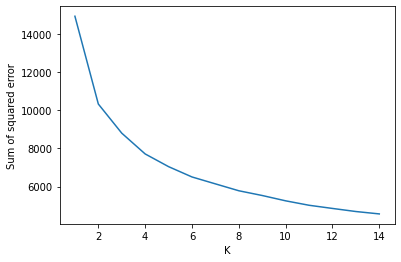

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=10)

In [ ]:
y_predicted = km.fit_predict(features[["clickrate_active","clickrate_reflective","clickrate_global","clickrate_sensing","clickrate_verbal","clickrate_visual","clickrate_sequential","education","age"]])

In [ ]:
y_predicted

array([6, 8, 8, ..., 3, 1, 1], dtype=int32)

In [ ]:
features['cluster']=y_predicted
features.head(100)

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
0,6516,0.060606,0.055556,0.444444,1.000000,0.300000,0.142857,1.0,HE Qualification,55<=,0.00,0.25,6
1,8462,0.200000,0.250000,0.354839,0.375000,0.625000,1.000000,1.0,HE Qualification,55<=,0.00,0.25,8
2,8462,0.200000,0.250000,0.354839,0.375000,0.625000,1.000000,1.0,HE Qualification,55<=,0.00,0.25,8
3,11391,0.240000,0.028169,0.227273,1.000000,0.800000,1.000000,1.0,HE Qualification,55<=,0.00,0.25,1
4,23629,0.100000,0.437500,0.400000,1.000000,1.000000,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,34293,0.131313,0.083532,0.562500,0.193548,1.000000,0.333333,1.0,Lower Than A Level,0-35,0.25,0.50,2
96,34353,0.201835,0.400000,0.400000,1.000000,1.000000,1.000000,1.0,A Level or Equivalent,35-55,0.50,0.75,1
97,34431,0.218182,0.272727,0.750000,1.000000,0.666667,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50,9
98,34431,0.218182,0.272727,0.750000,1.000000,0.666667,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50,9


In [ ]:
features[features["cluster"]==0].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
count,4.395000e+03,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395.000000,4395,4395,4395.000000,4395.000000,4395.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Level or Equivalent,0-35,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,3232,NaN,NaN,NaN
mean,7.120245e+05,0.284513,0.259029,0.473039,0.285800,0.890153,0.991184,0.996995,NaN,NaN,0.341524,0.563083,0.0
std,5.567813e+05,0.162749,0.163840,0.182147,0.140557,0.116507,0.047950,0.034987,NaN,NaN,0.191490,0.112081,0.0
min,2.421300e+04,0.009600,0.011364,0.038462,0.016667,0.600000,0.500000,0.500000,NaN,NaN,0.000000,0.250000,0.0
25%,5.057685e+05,0.176471,0.135537,0.333333,0.176471,0.780625,1.000000,1.000000,NaN,NaN,0.250000,0.500000,0.0
50%,5.940520e+05,0.254237,0.215625,0.487179,0.255102,0.916667,1.000000,1.000000,NaN,NaN,0.250000,0.500000,0.0
75%,6.460330e+05,0.349076,0.340408,0.591995,0.384615,1.000000,1.000000,1.000000,NaN,NaN,0.500000,0.750000,0.0


In [ ]:
features[features["cluster"]==2].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
count,2.591000e+03,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591,2591,2591.000000,2591.000000,2591.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Level or Equivalent,0-35,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1137,1764,NaN,NaN,NaN
mean,7.194108e+05,0.243741,0.132632,0.381430,0.258641,0.655873,0.444288,0.978362,NaN,NaN,0.336164,0.574778,2.0
std,5.701784e+05,0.116346,0.093868,0.138753,0.128551,0.187454,0.141373,0.078262,NaN,NaN,0.198767,0.119844,0.0
min,2.624700e+04,0.010870,0.007812,0.011173,0.015625,0.071429,0.047619,0.571429,NaN,NaN,0.000000,0.250000,2.0
25%,5.025145e+05,0.166667,0.078431,0.279241,0.166667,0.500000,0.333333,1.000000,NaN,NaN,0.250000,0.500000,2.0
50%,5.845940e+05,0.235294,0.117047,0.375000,0.246231,0.666667,0.500000,1.000000,NaN,NaN,0.250000,0.500000,2.0
75%,6.347210e+05,0.314050,0.149510,0.500000,0.333333,0.782871,0.500000,1.000000,NaN,NaN,0.500000,0.750000,2.0


In [ ]:
features[features["cluster"]==3].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
count,2.538000e+03,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538,2538,2538.000000,2538.000000,2538.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Level or Equivalent,0-35,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1060,1648,NaN,NaN,NaN
mean,7.132303e+05,0.243233,0.095492,0.351563,0.224010,0.614246,0.637402,0.370353,NaN,NaN,0.316489,0.583727,3.0
std,5.641167e+05,0.118068,0.043805,0.146397,0.131513,0.171385,0.293821,0.137162,NaN,NaN,0.201949,0.122117,0.0
min,2.621100e+04,0.016260,0.008000,0.035714,0.019048,0.035714,0.047619,0.043478,NaN,NaN,0.000000,0.250000,3.0
25%,5.083620e+05,0.162963,0.062500,0.250000,0.133333,0.500000,0.390199,0.250000,NaN,NaN,0.250000,0.500000,3.0
50%,5.760265e+05,0.230769,0.090909,0.333333,0.200000,0.615385,0.537523,0.333333,NaN,NaN,0.250000,0.500000,3.0
75%,6.074530e+05,0.309211,0.127496,0.454545,0.277778,0.742857,1.000000,0.500000,NaN,NaN,0.500000,0.750000,3.0


In [ ]:
features[features["cluster"]==4].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
count,1.134000e+03,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.0,1134,1134,1134.000000,1134.000000,1134.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lower Than A Level,0-35,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,563,871,NaN,NaN,NaN
mean,6.697220e+05,0.818966,0.902830,0.853266,0.987788,0.951322,0.990285,1.0,NaN,NaN,0.344356,0.557099,4.0
std,4.709638e+05,0.290707,0.166647,0.230153,0.076456,0.144685,0.071644,0.0,NaN,NaN,0.189715,0.106041,0.0
min,2.562900e+04,0.066667,0.500000,0.166667,0.333333,0.250000,0.250000,1.0,NaN,NaN,0.000000,0.250000,4.0
25%,5.183602e+05,0.600000,0.833333,0.666667,1.000000,1.000000,1.000000,1.0,NaN,NaN,0.250000,0.500000,4.0
50%,5.917830e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,NaN,NaN,0.250000,0.500000,4.0
75%,6.434912e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,NaN,NaN,0.500000,0.500000,4.0


In [ ]:
features[features["cluster"]==7].describe(include= 'all')

,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
count,2.579000e+03,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2579,2579,2579.000000,2579.000000,2579.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lower Than A Level,0-35,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1192,1936,NaN,NaN,NaN
mean,6.866838e+05,0.967685,0.258151,0.571311,0.966807,0.913696,0.987055,0.995110,NaN,NaN,0.341605,0.560392,7.0
std,4.928298e+05,0.091098,0.150080,0.264856,0.126118,0.189507,0.081809,0.053542,NaN,NaN,0.192515,0.109271,0.0
min,2.841800e+04,0.600000,0.007463,0.058824,0.200000,0.166667,0.125000,0.222222,NaN,NaN,0.000000,0.250000,7.0
25%,5.242740e+05,1.000000,0.136364,0.333333,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.250000,0.500000,7.0
50%,6.040270e+05,1.000000,0.240000,0.500000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.250000,0.500000,7.0
75%,6.520035e+05,1.000000,0.342286,0.750000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.500000,0.500000,7.0
